# RANDOM FOREST

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [2]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/DIABETES.csv", engine = "python", encoding="CP949")
df_raw.shape

(442, 11)

In [7]:
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop("Y", axis = 1, inplace = False)

In [8]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=123)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


In [9]:
rf_uncustomized = RandomForestRegressor(random_state=123)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.888
Score on test set : 0.363


In [12]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range (1,31)]

for v_n_estimators in para_n_tree :
    rf = RandomForestRegressor(random_state = 123
                               ,n_estimators=v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score


df_score_n["D"] = df_score_n["TrainScore"]-df_score_n["TestScore"]

df_score_n.round(3)

,n_estimators,TrainScore,TestScore,D
0,10,0.888,0.363,0.525
1,20,0.911,0.421,0.490
2,30,0.914,0.428,0.486
3,40,0.917,0.437,0.480
4,50,0.918,0.430,0.488
5,60,0.916,0.435,0.481
6,70,0.919,0.444,0.475
7,80,0.919,0.445,0.474
8,90,0.920,0.447,0.473
9,100,0.920,0.441,0.479


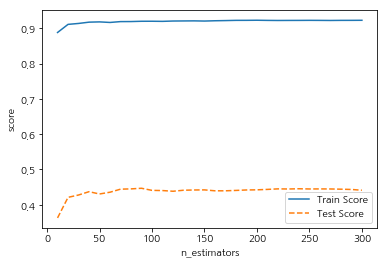

In [13]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [14]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range (1,31)]

for v_min_samples_leaf in para_leaf :
    rf = RandomForestRegressor(random_state = 123, n_estimators = 100,
                               min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["MinSamplesLeaf"] = para_leaf
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score


df_score_n["D"] = df_score_n["TrainScore"]-df_score_n["TestScore"]

df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore,D
0,1,0.920,0.441,0.479
1,2,0.885,0.447,0.438
2,3,0.838,0.452,0.386
3,4,0.798,0.454,0.343
4,5,0.760,0.466,0.294
5,6,0.727,0.474,0.253
6,7,0.702,0.478,0.223
7,8,0.681,0.473,0.208
8,9,0.663,0.475,0.188
9,10,0.646,0.474,0.173


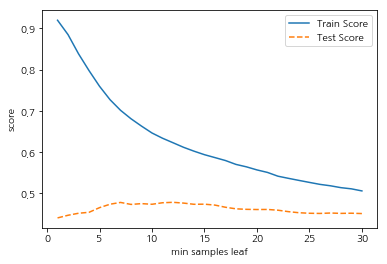

In [15]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [20]:
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(12, 31)]

for v_min_samples_split in para_split :
    rf = RandomForestRegressor(random_state=123, n_estimators = 100, min_samples_leaf=12,
                                min_samples_split = v_min_samples_split)
    rf.fit (df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score


df_score_split["D"] = df_score_split["TrainScore"]-df_score_split["TestScore"]

df_score_split.round(3)

,MinSampleSplit,TrainScore,TestScore,D
0,24,0.623,0.479,0.144
1,26,0.618,0.475,0.142
2,28,0.613,0.474,0.139
3,30,0.606,0.470,0.135
4,32,0.601,0.469,0.132
5,34,0.596,0.468,0.128
6,36,0.590,0.468,0.123
7,38,0.586,0.464,0.121
8,40,0.581,0.462,0.118
9,42,0.577,0.461,0.116


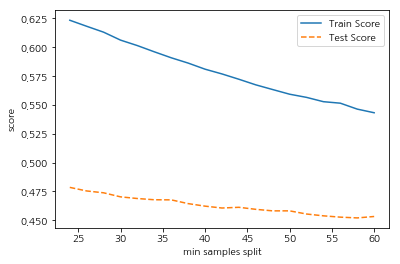

In [21]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [22]:
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 31)]

for v_max_depth in para_depth :
    rf = RandomForestRegressor(random_state=123, n_estimators = 100, min_samples_leaf=12, min_samples_split =24,
                                max_depth = v_max_depth)
    rf.fit (df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score


df_score_depth["D"] = df_score_depth["TrainScore"]-df_score_depth["TestScore"]

df_score_depth.round(3)

,Depth,TrainScore,TestScore,D
0,1,0.393,0.390,0.003
1,2,0.507,0.432,0.075
2,3,0.568,0.458,0.110
3,4,0.603,0.473,0.131
4,5,0.618,0.478,0.140
5,6,0.622,0.478,0.144
6,7,0.623,0.479,0.144
7,8,0.623,0.479,0.144
8,9,0.623,0.479,0.144
9,10,0.623,0.479,0.144


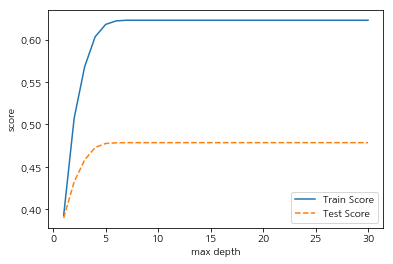

In [23]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [24]:
rf_final = RandomForestRegressor(random_state = 123, n_estimators = 100, min_samples_leaf=12, min_samples_split =24, max_depth=7)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("score on test seg: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))

Score on training set: 0.623
score on test seg: 0.479


In [25]:
rf_final

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=24,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

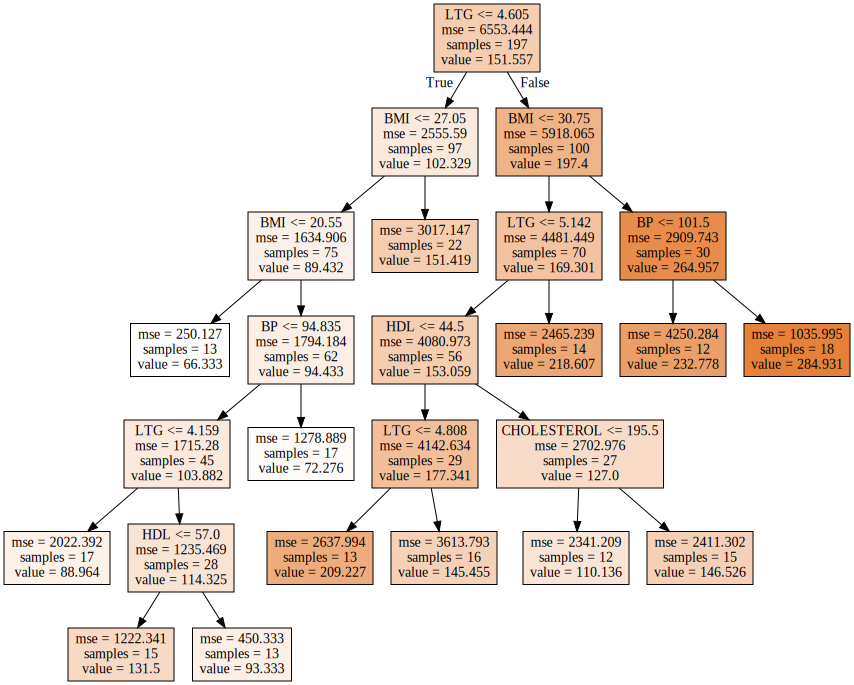

In [26]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names=v_feature_name, impurity = True, filled = True)
with open("rfr_final_0.dot") as f :
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

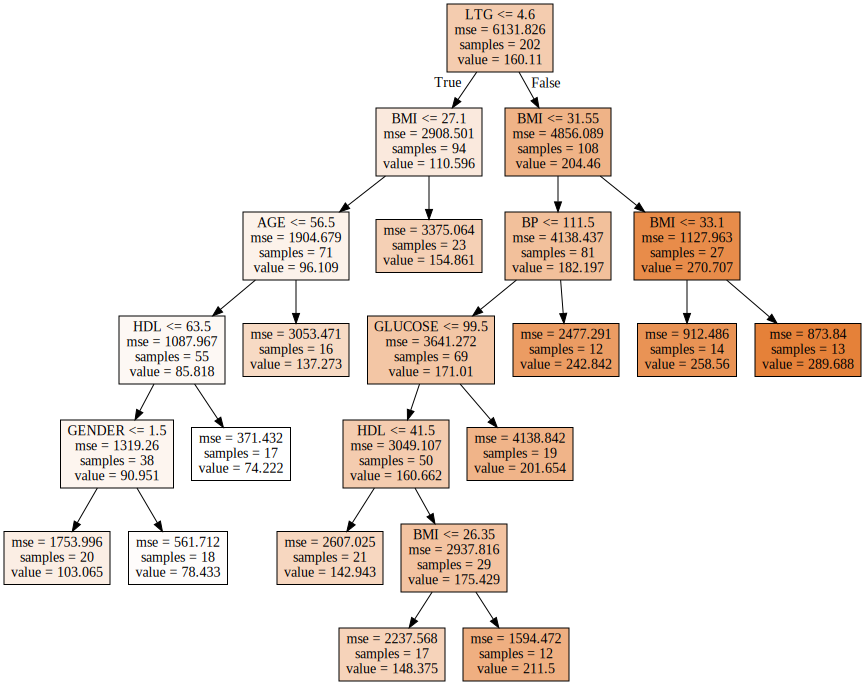

In [27]:
export_graphviz(rf_final.estimators_[1], out_file="rfr_final_0.dot", feature_names=v_feature_name, impurity = True, filled = True)
with open("rfr_final_0.dot") as f :
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

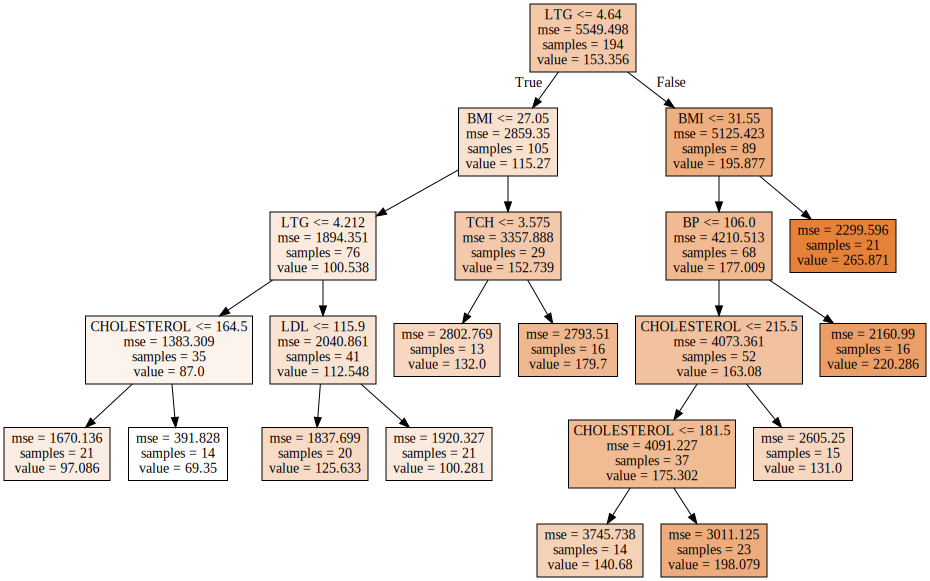

In [28]:
export_graphviz(rf_final.estimators_[9], out_file="rfr_final_0.dot", feature_names=v_feature_name, impurity = True, filled = True)
with open("rfr_final_0.dot") as f :
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [30]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.394
8,LTG,0.383
3,BP,0.064
9,GLUCOSE,0.052
6,HDL,0.030
0,AGE,0.019
5,LDL,0.018
4,CHOLESTEROL,0.015
1,GENDER,0.013
7,TCH,0.011


Text(0, 0.5, '변수')

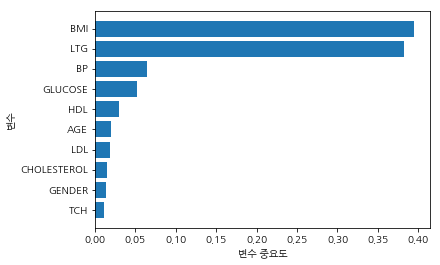

In [31]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [ ]:
estimator = RandomForestRegressor()

param_grid = {"n_estimators":para_n_tree, "max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))